In [ ]:
#ゼロから作る
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master

# 1章 Python入門

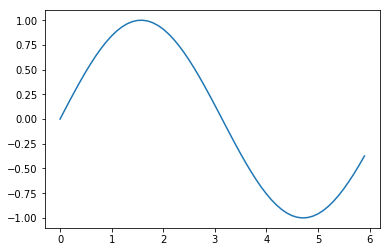

In [2]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

# データの作成
x = np.arange(0, 6, 0.1) # 0から6まで0.1刻みで生成
y = np.sin(x)

# グラフの描画
plt.plot(x, y)
plt.show()

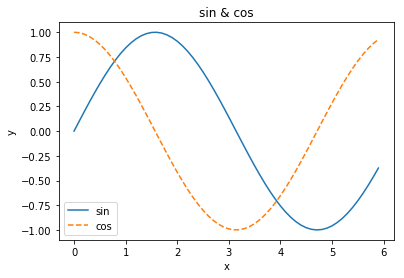

In [3]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

# データの作成
x = np.arange(0, 6, 0.1) # 0から6まで0.1刻みで生成
y1 = np.sin(x)
y2 = np.cos(x)

# グラフの描画
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle = "--", label="cos")
plt.xlabel("x") # x軸のラベル
plt.ylabel("y") # y軸のラベル
plt.title('sin & cos')
plt.legend()
plt.show()

# 2章 パーセプトロン

In [4]:
# coding: utf-8
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


# 3章 ニューラルネットワーク

In [13]:
import numpy as np
xs = np.array([1, -2, 3])
np.max(xs, 0)

3

In [14]:
xs = np.array([1, -2, 3])
np.maximum(xs, 0)  # [1, 0, 3]

array([1, 0, 3])

In [17]:
xs = np.array([1, -10, -2])
np.maximum(xs, 0)
#マイナスが切れる

array([1, 0, 0])

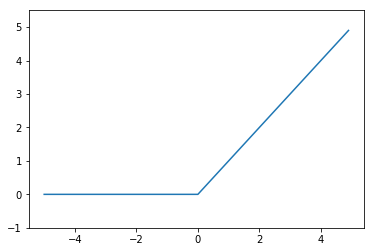

In [12]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

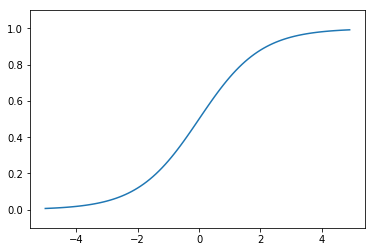

In [11]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

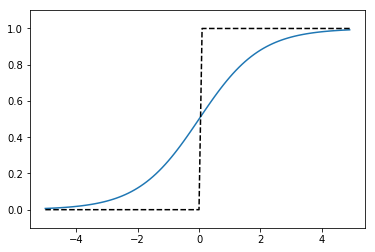

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()

In [35]:
# coding: utf-8
import numpy as np
def softmax(x):
    c = np.max(x)
    return np.exp(x-c) / np.sum(np.exp(x-c))

x = np.arange(-1.0, 1.0, 0.1)
y1 = softmax(x)
print(y1)

a = [23.0, 0.94, 5.46]
y1 = softmax(a)
print(y1)

[0.0164611  0.01819233 0.02010564 0.02222017 0.02455708 0.02713977
 0.02999409 0.03314859 0.03663486 0.04048778 0.04474592 0.04945189
 0.05465279 0.06040067 0.06675307 0.07377355 0.08153238 0.09010722
 0.09958388 0.1100572 ]
[9.99999976e-01 2.62702205e-10 2.41254141e-08]


In [19]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "./"
save_file = dataset_dir + "mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み
    
    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label : 
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか 
    
    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [91]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
x, t = get_data()

In [99]:
from matplotlib import pylab as plt
def img_show(img):
    plt.imshow(img)
    plt.gray()
    plt.show()

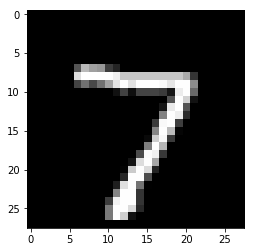

In [100]:
img_show(x[0].reshape(28, 28))

In [112]:
from numpy.random import *
#x        w1            w2            w3          y
#784   784*50   50*100   100*10 10
w1 = randn(784,50)
w2 = randn(50,100)
w3 = randn(100,10)
b1 = 0
b2 = 0
b3 = 0

#h = xw+b
#y = func(h)
def predict(x):
    x = sigmoid(np.dot(x, w1) + b1)
    x = sigmoid(np.dot(x, w2) + b2)
    y = softmax(np.dot(x, w3) + b3)
    return y

In [108]:
print(x.shape)
print("x:",x[0][200:210])
print(w1.shape)
print("w1:",w1[0])

(10000, 784)
x: [0.         0.         0.32941177 0.7254902  0.62352943 0.5921569
 0.23529412 0.14117648 0.         0.        ]
(784, 50)
w1: [-0.43873142  0.13627528 -0.10550799  0.89692742  1.3822401   0.99011975
  1.48143592 -0.65838889 -0.45759694 -0.81078846 -0.07463221 -0.26204019
 -0.64658239 -0.50969748  0.658395    2.47783252  1.22560811 -0.9591775
  0.89692374 -0.61062636 -0.68344948  0.30993439 -1.56897505  0.16825426
  1.41234614 -0.06914444 -1.00535757  0.60094397  0.80076596  0.02886387
 -0.77391895  0.59967602  1.29942677 -0.7118315   0.58859701 -0.57278655
  0.86414341 -1.09574517 -0.09326598 -0.64189505 -1.17037146 -0.12998353
  2.34892137  0.8977135  -0.48127581  1.10322171 -0.48526684  0.01096438
  1.3011582   0.41380183]


In [113]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
#     print("p:",p)
#     print("t:",t[i])
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.1316


# 重みを使用

In [118]:
import pickle
with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
print(network["W1"].shape)
print(network["W2"].shape)
print(network["W3"].shape)

print(network["b1"].shape)
print(network["b2"].shape)
print(network["b3"].shape)


(784, 50)
(50, 100)
(100, 10)
(50,)
(100,)
(10,)


In [119]:
from numpy.random import *
#x        w1            w2            w3          y
#784   784*50   50*100   100*10 10
w1 = network["W1"]
w2 = network["W2"]
w3 = network["W3"]
b1 = 0
b2 = 0
b3 = 0

#h = xw+b
#y = func(h)
def predict(x):
    x = sigmoid(np.dot(x, w1) + b1)
    x = sigmoid(np.dot(x, w2) + b2)
    y = softmax(np.dot(x, w3) + b3)
    return y

In [120]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
#     print("p:",p)
#     print("t:",t[i])
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9311


バイアスいじらなくても良い精度。バイアス一応みとく。

In [121]:
network["b1"]

array([-0.06750315,  0.0695926 , -0.02730473,  0.02256093, -0.22001474,
       -0.22038847,  0.04862635,  0.13499236,  0.23342554, -0.0487357 ,
        0.10170191, -0.03076038,  0.15482435,  0.05212503,  0.06017235,
       -0.03364862, -0.11218343, -0.26460695, -0.03323386,  0.13610415,
        0.06354368,  0.04679805, -0.01621654, -0.05775835, -0.03108677,
        0.10366164, -0.0845938 ,  0.11665157,  0.21852103,  0.04437255,
        0.03378392, -0.01720384, -0.07383765,  0.16152057, -0.10621249,
       -0.01646949,  0.00913961,  0.10238428,  0.00916639, -0.0564299 ,
       -0.10607515,  0.09892716, -0.07136887, -0.06349134,  0.12461706,
        0.02242282, -0.00047972,  0.04527043, -0.15179175,  0.10716812],
      dtype=float32)

In [122]:
from numpy.random import *
#x        w1            w2            w3          y
#784   784*50   50*100   100*10 10
w1 = network["W1"]
w2 = network["W2"]
w3 = network["W3"]
b1 = network["b1"]
b2 = network["b2"]
b3 = network["b3"]

#h = xw+b
#y = func(h)
def predict(x):
    x = sigmoid(np.dot(x, w1) + b1)
    x = sigmoid(np.dot(x, w2) + b2)
    y = softmax(np.dot(x, w3) + b3)
    return y

In [123]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
#     print("p:",p)
#     print("t:",t[i])
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


微妙に良くなった。

In [124]:
!pip install -U deap

    100% |████████████████████████████████| 942kB 1.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for deap ... done
  Stored in directory: /Users/miyamoto/Library/Caches/pip/wheels/82/aa/67/2c93e17c84646c86099fda53ee0b3329372dcf94dd8789fd13
Successfully built deap
Exception:
Traceback (most recent call last):
  File "/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=ro